<a href="https://colab.research.google.com/github/Gundaboinavarshitha/DA-Assignments/blob/main/Yet_another_copy_of_EdEurope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [3]:
presponse = requests.get('https://visaguide.world/europe/')

In [6]:
gdpresponse = requests.get('https://en.m.wikipedia.org/wiki/List_of_sovereign_states_in_Europe_by_GDP_(nominal)')

In [7]:
popsoup = BeautifulSoup(presponse.content, 'html.parser')

In [5]:
gdpsoup = BeautifulSoup(presponse.content, 'html.parser')

In [9]:
poptable=popsoup.find_all('table')

In [8]:
gdptable=gdpsoup.find_all('table')

In [10]:
popheadings = poptable[1].find_all('th')
popheadings

[<th>Country</th>, <th>Capital</th>, <th>Area</th>, <th>Population (2021)</th>]

In [11]:
gdpheadings=gdptable[1].find_all('th')
gdpheadings

[<th>Country</th>, <th>Capital</th>, <th>Area</th>, <th>Population (2021)</th>]

In [12]:
popheadings=poptable[1].find_all('th')
popheadings=[i.text.strip() for i in popheadings]


In [14]:
# Instead of this:
# gdpheadings1 = [i.strip() for i in gdpheadings]

# Try this:
gdpheadings1 = [i.text.strip() for i in gdpheadings if i.text is not None]

# This modification ensures that strip() is only called on elements that have text content.


In [15]:
gdpheadings=gdpheadings1

In [16]:
if len(gdpheadings) > 1:
  gdpheadings[1]=gdpheadings[1][:4]
else:
  print("List has fewer than 2 elements")

In [17]:
print(gdpheadings)

['Country', 'Capi', 'Area', 'Population (2021)']


In [18]:
gdpheadings

['Country', 'Capi', 'Area', 'Population (2021)']

In [19]:
poprows=poptable[1].find_all('td')
poprows

[<td>Albania</td>,
 <td>Tirana</td>,
 <td>28,748 km²</td>,
 <td>2.8 million</td>,
 <td>Andorra</td>,
 <td>Andorra la Vella</td>,
 <td>468 km²</td>,
 <td>77,335</td>,
 <td>Austria</td>,
 <td>Vienna</td>,
 <td>83,858 km²</td>,
 <td>9 million</td>,
 <td>Belarus</td>,
 <td>Minsk</td>,
 <td>207,560 km²</td>,
 <td>9.4 million</td>,
 <td>Belgium</td>,
 <td>Brussels</td>,
 <td>30,528 km²</td>,
 <td>11.6 million</td>,
 <td>Bosnia and Herzegovina</td>,
 <td>Sarajevo</td>,
 <td>51,129 km²</td>,
 <td>3.2 million</td>,
 <td>Bulgaria</td>,
 <td>Sofia</td>,
 <td>110,910 km²</td>,
 <td>6.8 million</td>,
 <td>Croatia</td>,
 <td>Zagreb</td>,
 <td>56,542 km²</td>,
 <td>4 million</td>,
 <td>Cyprus</td>,
 <td>Nicosia</td>,
 <td>9,251 km²</td>,
 <td>1.2 million</td>,
 <td>Czech Republic</td>,
 <td>Prague</td>,
 <td>78,866 km²</td>,
 <td>10.7 million</td>,
 <td>Denmark</td>,
 <td>Copenhagen</td>,
 <td>43,094 km²</td>,
 <td>5.8 million</td>,
 <td>Estonia</td>,
 <td>Tallinn</td>,
 <td>45,226 km²</td>,
 <td>1.3

In [20]:
poprows = [i.text.strip() for i in poprows if i.text is not None]

In [21]:
gdprows=gdptable[1].find_all('td')


In [22]:
gdprows=[i.text.strip() for i in gdprows]


In [23]:
popdict={}
n=0
for i in popheadings:
   popdict[i]=[poprows[j] for j in range(n,len(poprows),len(popheadings))]
   n+=1


In [24]:
gdpdict={}
n=0
for i in gdpheadings:
    gdpdict[i]=[gdprows[j] for j in range(n,len(gdprows),len(gdpheadings1))]
    n+=1

In [25]:
popdf = pd.DataFrame(popdict)
gdpdf = pd.DataFrame(gdpdict)

In [ ]:
popdf

,Country,Capital,Area,Population (2021)
0,Albania,Tirana,"28,748 km²",2.8 million
1,Andorra,Andorra la Vella,468 km²,"77,335"
2,Austria,Vienna,"83,858 km²",9 million
3,Belarus,Minsk,"207,560 km²",9.4 million
4,Belgium,Brussels,"30,528 km²",11.6 million
5,Bosnia and Herzegovina,Sarajevo,"51,129 km²",3.2 million
6,Bulgaria,Sofia,"110,910 km²",6.8 million
7,Croatia,Zagreb,"56,542 km²",4 million
8,Cyprus,Nicosia,"9,251 km²",1.2 million
9,Czech Republic,Prague,"78,866 km²",10.7 million


In [26]:
gdpdf

,Country,Capi,Area,Population (2021)
0,Albania,Tirana,"28,748 km²",2.8 million
1,Andorra,Andorra la Vella,468 km²,"77,335"
2,Austria,Vienna,"83,858 km²",9 million
3,Belarus,Minsk,"207,560 km²",9.4 million
4,Belgium,Brussels,"30,528 km²",11.6 million
5,Bosnia and Herzegovina,Sarajevo,"51,129 km²",3.2 million
6,Bulgaria,Sofia,"110,910 km²",6.8 million
7,Croatia,Zagreb,"56,542 km²",4 million
8,Cyprus,Nicosia,"9,251 km²",1.2 million
9,Czech Republic,Prague,"78,866 km²",10.7 million


In [27]:
gdpdf1=gdpdf.copy()

In [28]:
print(gdpdf)

                   Country              Capi           Area Population (2021)
0                  Albania            Tirana     28,748 km²       2.8 million
1                  Andorra  Andorra la Vella        468 km²            77,335
2                  Austria            Vienna     83,858 km²         9 million
3                  Belarus             Minsk    207,560 km²       9.4 million
4                  Belgium          Brussels     30,528 km²      11.6 million
5   Bosnia and Herzegovina          Sarajevo     51,129 km²       3.2 million
6                 Bulgaria             Sofia    110,910 km²       6.8 million
7                  Croatia            Zagreb     56,542 km²         4 million
8                   Cyprus           Nicosia      9,251 km²       1.2 million
9           Czech Republic            Prague     78,866 km²      10.7 million
10                 Denmark        Copenhagen     43,094 km²       5.8 million
11                 Estonia           Tallinn     45,226 km²     

In [29]:
popdf.rename(columns={"Population (2021)": "Population"},inplace=True)


In [30]:
for i in range(len(popdf['Population'])):
  value = str(popdf.at [i, 'Population'])

  if 'million' in value:
     popdf.at[i, 'Population'] = float(value.replace('million', '').strip()) *10**6
  else:
      value = value.replace(".", "").replace(",", "")
      popdf.at[i, 'Population'] = value

In [31]:
popdf['Population']=popdf['Population'].astype(float).round(2)

In [32]:
for i in range(len(popdf['Area'])):
  value = str(popdf.at [i, 'Area'])

  if 'km²' in value:
      value = value.replace(',', '')
      value = float(value.replace('km²', ''))
      popdf.at[i, 'Area'] = value

In [33]:
for i in range(len(popdf['Area'])):
    value = str(popdf.at[i, 'Area'])
    if 'km²' in value:
        value = value.replace(',', '')
        value = float(value.replace('km²', ''))
        popdf.at[i, 'Area'] = value
    else:
        # Try to convert to float, handle errors by setting to NaN
        try:
            popdf.at[i, 'Area'] = float(value.replace(',', ''))
        except ValueError:
            popdf.at[i, 'Area'] = float('nan')  # or handle differently

popdf['Area'] = pd.to_numeric(popdf['Area'], errors='coerce') # Convert entire column
popdf['Population Density'] = popdf['Population'] / popdf['Area']


In [34]:
print("columns in popdf:",popdf.columns)
print("columns in gdpdf:",gdpdf.columns)

columns in popdf: Index(['Country', 'Capital', 'Area', 'Population', 'Population Density'], dtype='object')
columns in gdpdf: Index(['Country', 'Capi', 'Area', 'Population (2021)'], dtype='object')


In [35]:
print("gdpdict:",gdpdict)

gdpdict: {'Country': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'], 'Capi': ['Tirana', 'Andorra la Vella', 'Vienna', 'Minsk', 'Brussels', 'Sarajevo', 'Sofia', 'Zagreb', 'Nicosia', 'Prague', 'Copenhagen', 'Tallinn', 'Helsinki', 'Paris', 'Berlin', 'Athens', 'Budapest', 'Reykjavik', 'Dublin', 'Rome', 'Prishtina', 'Riga', 'Vaduz', 'Vilnius', 'Luxembourg', 'Valletta', 'Chisinau', 'Monaco', 'Podgorica', 'Amsterdam', 'Skopje', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest', 'Moscow', 'San Marin

In [36]:
gdpdf=pd.DataFrame(gdpdict)
print(gdpdf.head())

   Country              Capi         Area Population (2021)
0  Albania            Tirana   28,748 km²       2.8 million
1  Andorra  Andorra la Vella      468 km²            77,335
2  Austria            Vienna   83,858 km²         9 million
3  Belarus             Minsk  207,560 km²       9.4 million
4  Belgium          Brussels   30,528 km²      11.6 million


In [37]:
print("Columns in gdpdf:" , gdpdf.columns)

Columns in gdpdf: Index(['Country', 'Capi', 'Area', 'Population (2021)'], dtype='object')


In [38]:
print(gdptable)
print(gdprows)

[<table>
<tbody>
<tr>
<td>Area</td>
<td>10,180,000 km²</td>
</tr>
<tr>
<td>Number of countries</td>
<td>46 (plus transcontinental countries)</td>
</tr>
<tr>
<td>Biggest country (by area)</td>
<td>Russia</td>
</tr>
<tr>
<td>Population (2021)</td>
<td>747.8 million</td>
</tr>
<tr>
<td>Most populated country</td>
<td>Russia</td>
</tr>
<tr>
<td>Number of languages spoken</td>
<td>Over 200 languages across the continent</td>
</tr>
<tr>
<td>Largest peninsula</td>
<td>The Scandinavian Peninsula</td>
</tr>
<tr>
<td>Highest mountain</td>
<td>Mount Elbrus in Russia</td>
</tr>
<tr>
<td>Longest river</td>
<td>Volga River in Russia</td>
</tr>
</tbody>
</table>, <table>
<thead>
<tr>
<th>Country</th>
<th>Capital</th>
<th>Area</th>
<th>Population (2021)</th>
</tr>
</thead>
<tbody>
<tr>
<td>Albania</td>
<td>Tirana</td>
<td>28,748 km²</td>
<td>2.8 million</td>
</tr>
<tr>
<td>Andorra</td>
<td>Andorra la Vella</td>
<td>468 km²</td>
<td>77,335</td>
</tr>
<tr>
<td>Austria</td>
<td>Vienna</td>
<td>83,858 km²

In [39]:
print("gdpdict:",gdpdict)

gdpdict: {'Country': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'], 'Capi': ['Tirana', 'Andorra la Vella', 'Vienna', 'Minsk', 'Brussels', 'Sarajevo', 'Sofia', 'Zagreb', 'Nicosia', 'Prague', 'Copenhagen', 'Tallinn', 'Helsinki', 'Paris', 'Berlin', 'Athens', 'Budapest', 'Reykjavik', 'Dublin', 'Rome', 'Prishtina', 'Riga', 'Vaduz', 'Vilnius', 'Luxembourg', 'Valletta', 'Chisinau', 'Monaco', 'Podgorica', 'Amsterdam', 'Skopje', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest', 'Moscow', 'San Marin

In [40]:
print("GDPDF Columns:",gdpdf.columns)
print("POPDF Columns:",popdf.columns)


GDPDF Columns: Index(['Country', 'Capi', 'Area', 'Population (2021)'], dtype='object')
POPDF Columns: Index(['Country', 'Capital', 'Area', 'Population', 'Population Density'], dtype='object')


In [41]:

finaldata=pd.merge(gdpdf,popdf,on='Country')

In [42]:
gdpdf['Country']=gdpdf['Country'].str.strip()
popdf['Country']=popdf['Country'].str.strip()

In [43]:
gdpdf.head(10)

,Country,Capi,Area,Population (2021)
0,Albania,Tirana,"28,748 km²",2.8 million
1,Andorra,Andorra la Vella,468 km²,"77,335"
2,Austria,Vienna,"83,858 km²",9 million
3,Belarus,Minsk,"207,560 km²",9.4 million
4,Belgium,Brussels,"30,528 km²",11.6 million
5,Bosnia and Herzegovina,Sarajevo,"51,129 km²",3.2 million
6,Bulgaria,Sofia,"110,910 km²",6.8 million
7,Croatia,Zagreb,"56,542 km²",4 million
8,Cyprus,Nicosia,"9,251 km²",1.2 million
9,Czech Republic,Prague,"78,866 km²",10.7 million


In [44]:
print(finaldata.columns)

Index(['Country', 'Capi', 'Area_x', 'Population (2021)', 'Capital', 'Area_y',
       'Population', 'Population Density'],
      dtype='object')


In [45]:
finaldata.rename(columns={'GDP_2024': '2024'},inplace=True)

In [46]:


# ipython-input-148-8b3dc7687592

import pandas as pd
finaldata =pd.merge(popdf, gdpdf, on ='Country')
finaldata.rename(columns={"GDP_2024": "2024"}, inplace=True)
if '2024' in finaldata.columns and finaldata['2024'].dtype=='object':
        finaldata['2024'] = finaldata['2024'].str.replace(",", "").astype(float).round(2)

In [47]:
print(finaldata.columns)

Index(['Country', 'Capital', 'Area_x', 'Population', 'Population Density',
       'Capi', 'Area_y', 'Population (2021)'],
      dtype='object')


In [48]:
print(finaldata.columns)

Index(['Country', 'Capital', 'Area_x', 'Population', 'Population Density',
       'Capi', 'Area_y', 'Population (2021)'],
      dtype='object')


In [49]:
print(finaldata[['Country','Population (2021)']].head())

   Country Population (2021)
0  Albania       2.8 million
1  Andorra            77,335
2  Austria         9 million
3  Belarus       9.4 million
4  Belgium      11.6 million


In [50]:
finaldata.rename(columns={'Population (2021)': '2024'}, inplace=True)

In [51]:
print(finaldata[['Country', '2024']].head(20))

print(finaldata['2024'].unique())

finaldata['2024'] =pd.to_numeric(finaldata['2024'].astype(str).str.replace(",", ""), errors='coerce')

print(finaldata [finaldata[ '2024'].isna()])

finaldata['2024'].fillna(0, inplace=True)

if '2024' in finaldata.columns and 'Population' in finaldata.columns:
  finaldata['GDP per capita']= (finaldata['2024']*10**9) / finaldata['Population']
else:
    print("Cannot calculate GDP per capita: '2024' or 'Population' column missing.")
#Step 6: Show output

print(finaldata[['Country', '2024', 'Population', 'GDP per capita']].head())

                   Country          2024
0                  Albania   2.8 million
1                  Andorra        77,335
2                  Austria     9 million
3                  Belarus   9.4 million
4                  Belgium  11.6 million
5   Bosnia and Herzegovina   3.2 million
6                 Bulgaria   6.8 million
7                  Croatia     4 million
8                   Cyprus   1.2 million
9           Czech Republic  10.7 million
10                 Denmark   5.8 million
11                 Estonia   1.3 million
12                 Finland   5.5 million
13                  France  65.4 million
14                 Germany  83.9 million
15                  Greece  10.3 million
16                 Hungary   9.6 million
17                 Iceland       343,353
18                 Ireland   4.9 million
19                   Italy  60.3 million
['2.8 million' '77,335' '9 million' '9.4 million' '11.6 million'
 '3.2 million' '6.8 million' '4 million' '1.2 million' '10.7 million'
 '5.

<ipython-input-51-48c23216933a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  finaldata['2024'].fillna(0, inplace=True)


In [52]:
dff = finaldata[['Population','Population Density','GDP per capita','2024']]

dff = dff.round(2)

dff['Country']=finaldata['Country'].values
print(dff.head())

   Population  Population Density  GDP per capita     2024  Country
0   2800000.0               97.40    0.000000e+00      0.0  Albania
1     77335.0              165.25    1.000000e+09  77335.0  Andorra
2   9000000.0              107.32    0.000000e+00      0.0  Austria
3   9400000.0               45.29    0.000000e+00      0.0  Belarus
4  11600000.0              379.98    0.000000e+00      0.0  Belgium


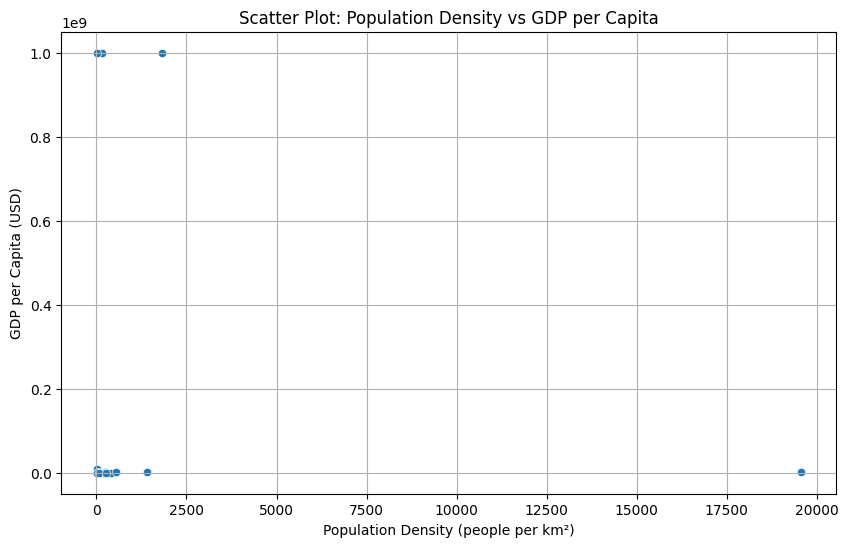

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=finaldata['Population Density'], y=finaldata['GDP per capita'])

# Labels & title

plt.xlabel('Population Density (people per km²)')
plt.ylabel('GDP per Capita (USD)')
plt.title('Scatter Plot: Population Density vs GDP per Capita')
plt.grid(True)

#Show plot

plt.show()

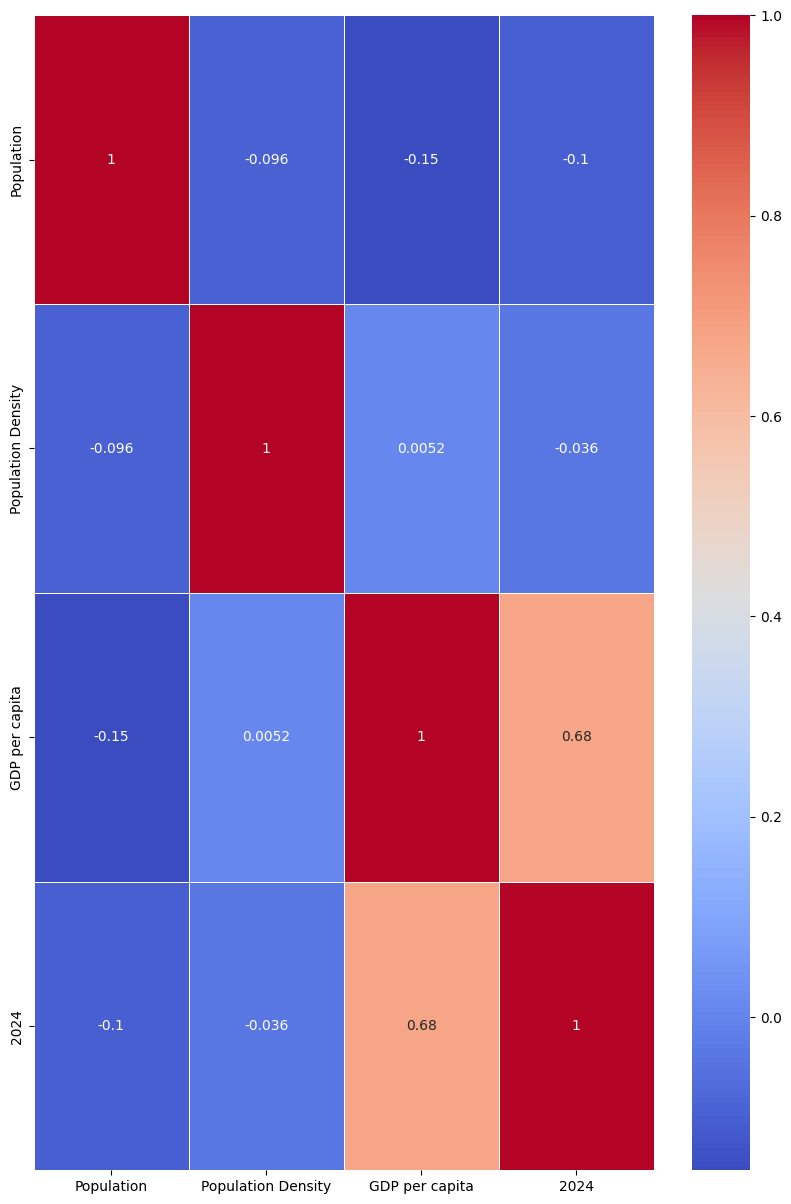

In [54]:
import seaborn as sns

import matplotlib.pyplot as plt

#Select relevant columns

dff =finaldata[['Country', 'Population', 'Population Density', 'GDP per capita', '2024']]

#Set Country as index

dff=dff.set_index('Country')

#Create heatmap

plt.figure(figsize=(10, 15)) # Set figure size

# Corrected the typo from 'сmар' to 'cmap'
sns.heatmap(dff.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

#Show plot

plt.show()

In [55]:
finaldata.sort_values(by='2024', ascending=False,inplace=True)

In [56]:
dff = finaldata[['Population','Population Density','GDP per capita','2024']].copy()

dff = dff.round(2)

dff['Country']=finaldata['Country'].values
print(dff.head())

    Population  Population Density  GDP per capita       2024       Country
17    343353.0                3.33    1.000000e+09  343353.00       Iceland
1      77335.0              165.25    1.000000e+09   77335.00       Andorra
45       800.0             1818.18    1.000000e+09     800.00  Vatican City
24    634814.0              245.48    1.000000e+06     634.81    Luxembourg
28    628053.0               45.47    1.000000e+06     628.05    Montenegro


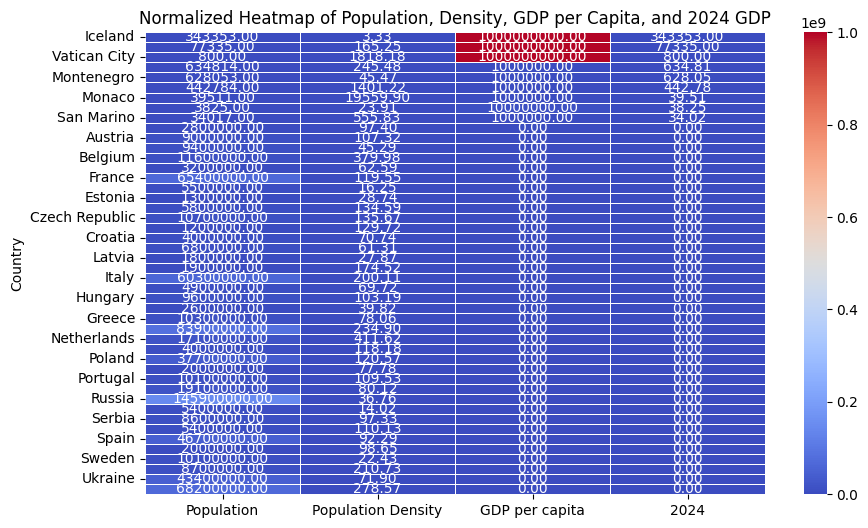

In [57]:
import seaborn as sns

import matplotlib.pyplot as plt

#Set 'Country' as index
dfn = dff.set_index('Country')

#Convert all columns to numeric (force errors-coerce to handle any bad values)

dfn = dfn.apply(pd.to_numeric, errors='coerce')

#Fill any Nall values with column means (optional but recommended)

dfn=dfn.fillna(dfn.mean())

#Normalize using Min-Max scaling to the range of 1-5

dfn1=1+ (((dfn- dfn.min()) / (dfn.max() -dfn.min())) *(5-1))

#Create the heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(dfn, annot= True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

#show plot

plt.title("Normalized Heatmap of Population, Density, GDP per Capita, and 2024 GDP")
plt.show()

In [58]:
finaldata.to_csv("europedata.csv",index=False)

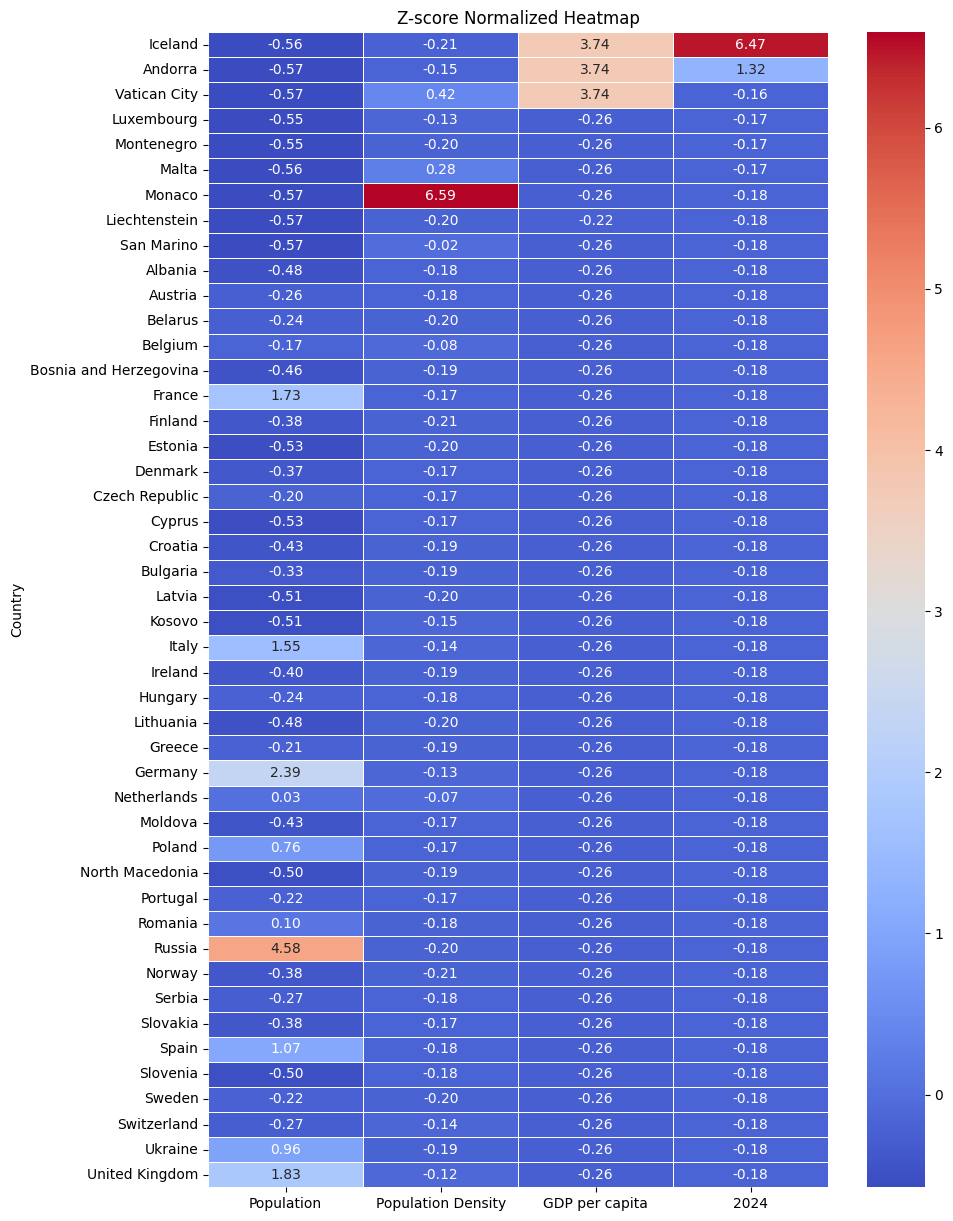

In [59]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

#Ensure all columns are numeric and handle missing values
df_scaled = dff.set_index('Country').apply(pd.to_numeric, errors = 'coerce')

#Standardize the data (2-score normalization)

df_scaled = (df_scaled - df_scaled.mean()) / df_scaled.std()

#Fill any remaining Nall values (if any) with 8 to prevent errors
df_scaled = df_scaled.fillna(0)

#Create the heatmap

plt.figure(figsize=(10, 15))

sns.heatmap(df_scaled, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

#Show the plot

plt.title("Z-score Normalized Heatmap")

plt.show()

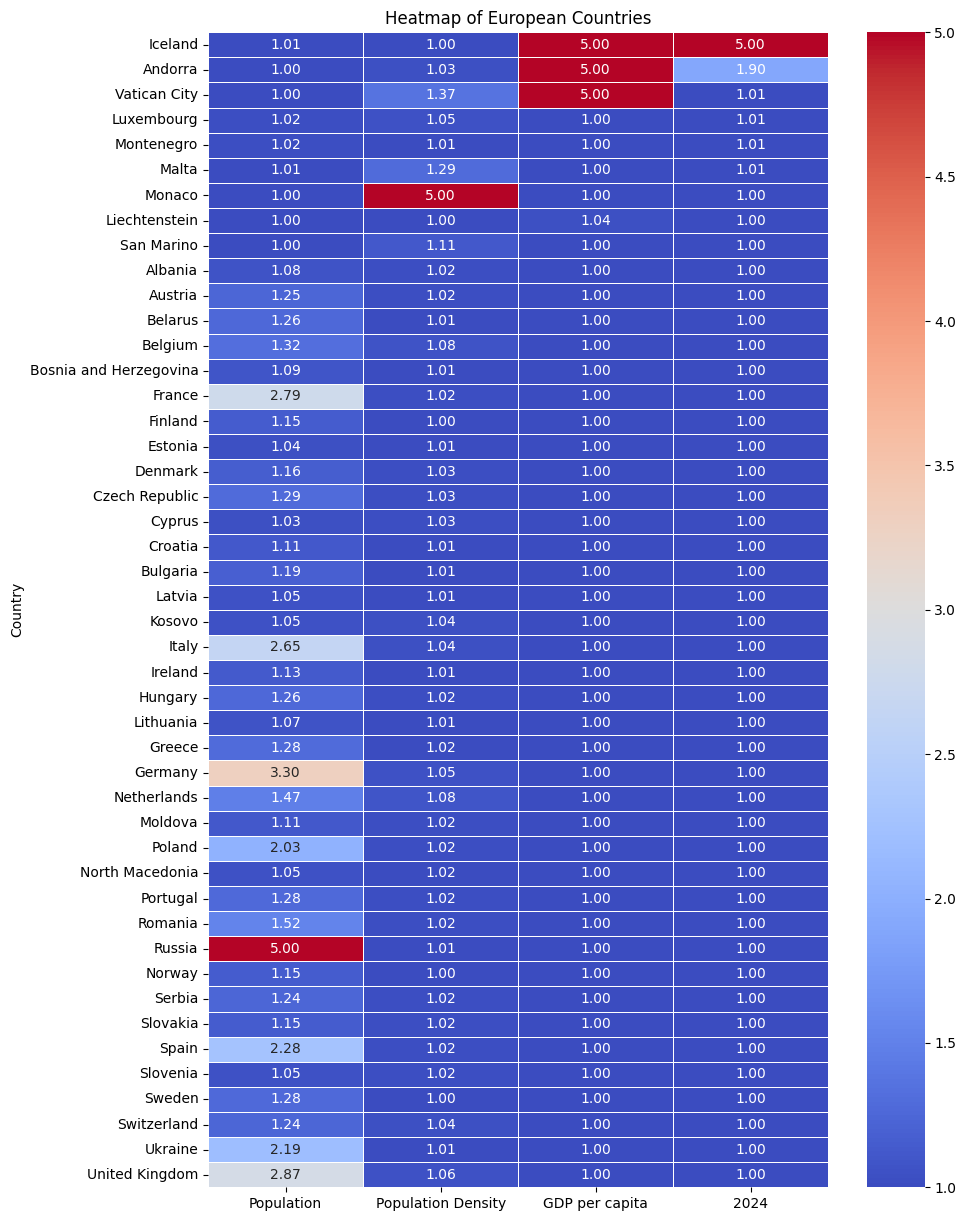

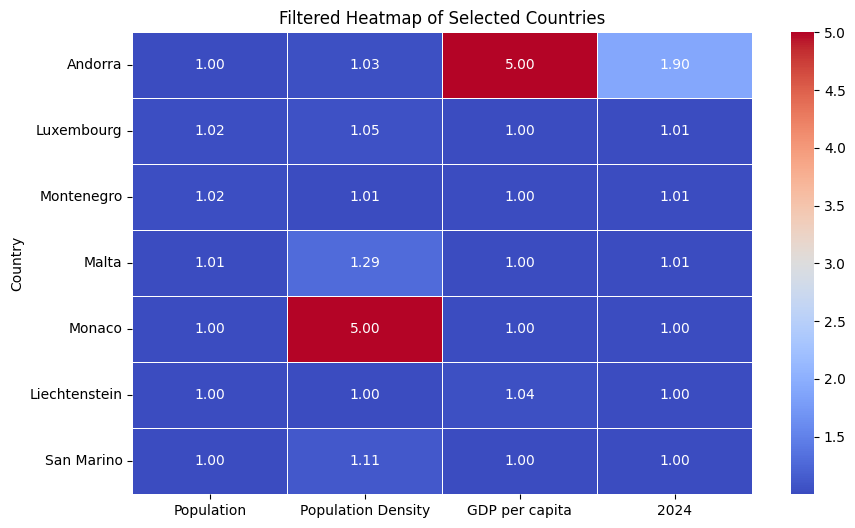

In [60]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#Load the cleaned dataset

finaldata = pd.read_csv("europedata.csv")

#Ensure no extra spaces in column names

finaldata.columns = finaldata.columns.str.strip()

# Convert '2024' column to numeric format

if '2024' in finaldata.columns:
  finaldata['2024'] = finaldata['2024'].astype(str).str.replace(",", "").astype(float)

#Ensure Population column is numeric

finaldata['Population'] = pd.to_numeric(finaldata['Population'], errors='coerce')

#Calculate GDP per capita

finaldata['GDP per capita'] = (finaldata['2024']* 10**9) / finaldata['Population']

#Select necessary columns for visualization

dff = finaldata[['Country', 'Population', 'Population Density', 'GDP per capita', '2024']].copy()

# Round the numeric values to 2 decimal places

dff[['Population', 'Population Density', 'GDP per capita', '2024']] - dff [['Population', 'Population']]

dfn-dff.set_index('Country')
dfn = 1 + ((dfn - dfn.min()) / (dfn.max() - dfn.min())) * (5-1)

dfn.dropna(inplace = True)
if dfn.empty:
  print("No data available after scaling. Check filtering conditions.")

else:
  # Plot the heatmap
  plt.figure(figsize=(10, 15))
  sns.heatmap(dfn, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
  plt.title("Heatmap of European Countries")
  plt.show()


# Apply filtering conditions

filtered_dfn = dfn[
    (dfn['Population Density'] > 1.0) &
    (dfn['Population'] > 1.0) &
    (dfn['2024'] > 1.0) &
    (dfn ['GDP per capita'] > 1.0)
  ].dropna()
#Check if filtering removed all rows

if filtered_dfn.empty:
  print("No data meets the filtering conditions. Try adjusting thresholds.")

else:
  #Plot filtered heatmap
  plt.figure(figsize=(10, 6))
  sns.heatmap(filtered_dfn, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
  plt.title("Filtered Heatmap of Selected Countries")
  plt.show()

#Save final data to CSV

finaldata.to_csv("europedata_cleaned.csv", index=False)



# New Section

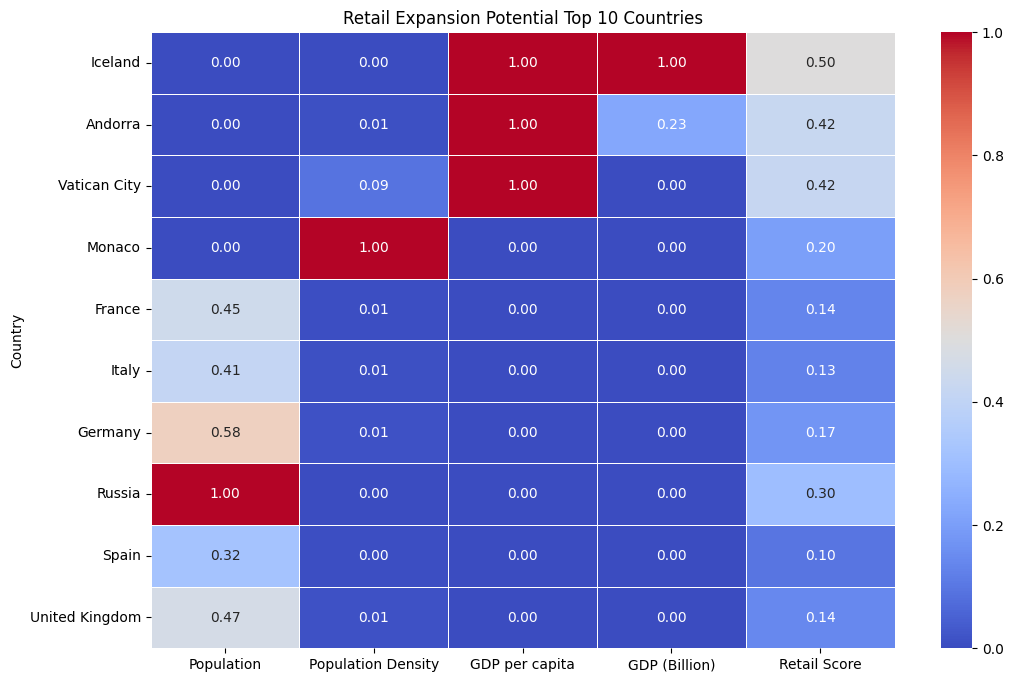

In [65]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#Load the dataset

data2 = pd.read_csv("europedata_cleaned.csv")# Ensure the correct file name

#Rename columns for clarity (if necessary)

data2.columns = data2.columns.str.strip() # Remove any leading/trailing spaces

# Select relevant columns for analysis

df_selected = data2 [["Country", "Population", "Population Density", "GDP per capita", "2024"]].copy()

# Rename "2024' to 'GDP (Billion) for clarity

df_selected.rename(columns={"2024": "GDP (Billion)"}, inplace=True)



# Define weights for scoring

weights = {

"GDP per capita": 0.4,  # Higher purchasing power

"Population": 0.3,   #Large customer base

"Population Density": 0.2,  # Urbanization & foot traffic

"GDP (Billion)": 0.1 # Economic stability

}
#Normalize data using Min-Max Scaling

df_normalized = df_selected.copy()
for col in weights.keys():
  df_normalized[col] = (df_normalized [col]- df_normalized[col].min()) / (
      df_normalized[col].max() - df_normalized[col].min()
  )

#Compute the Retail Score using a weighted sum

df_normalized["Retail Score"] = sum(
    df_normalized [col] * weight for col, weight in weights.items()
)
#Get top 10 countries for retail expansion

top_10_countries = df_normalized.nlargest (10, "Retail Score") [["Country", "Retail Score"]]

#Filter the dataset to include only these top 10 countries

df_top_10 = df_normalized [df_normalized["Country"].isin(top_10_countries["Country"])]

#Set Country as index for visualization

df_top_10 = df_top_10.set_index("Country")



#Heatmap for only the top 10 countries

plt.figure(figsize=(12, 8))

sns.heatmap(df_top_10, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Retail Expansion Potential Top 10 Countries")

plt.show()

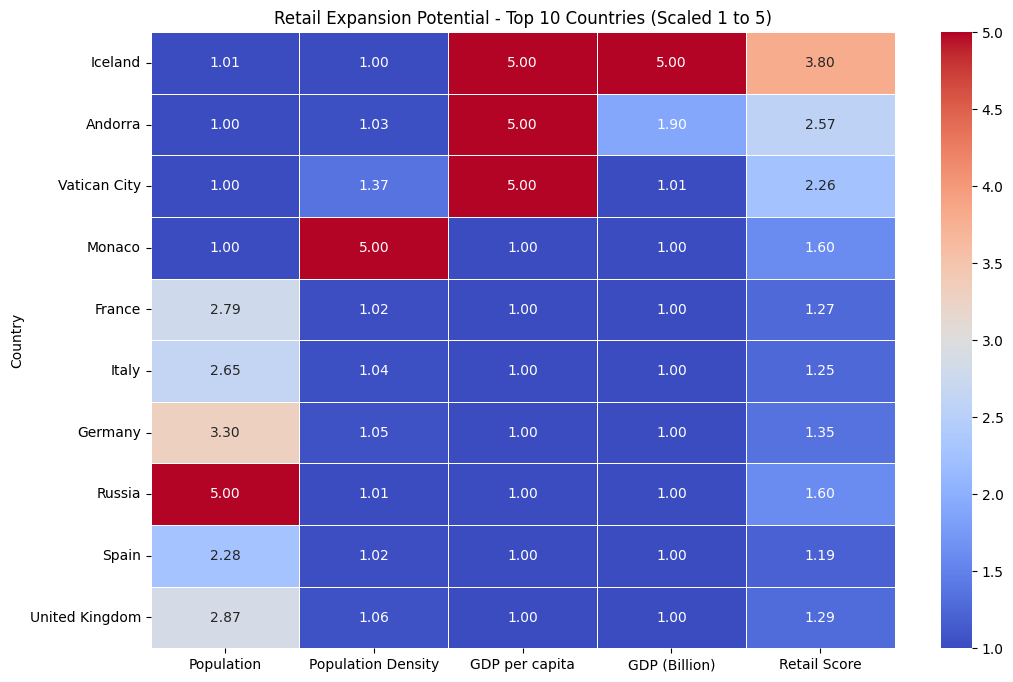

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data3 = pd.read_csv("europedata_cleaned.csv")  # Ensure the correct filename

# Rename columns for clarity (if necessary)
data3.columns = data3.columns.str.strip()  # Remove leading/trailing spaces

# Select relevant columns for analysis
df_selected = data3[["Country", "Population", "Population Density", "GDP per capita", "2024"]].copy()

# Rename '2024' to 'GDP (Billion)' for clarity
df_selected.rename(columns={"2024": "GDP (Billion)"}, inplace=True)

# Define updated weights
weights = {
    "GDP per capita": 0.3,     # Purchasing power
    "Population": 0.15,        # Market size
    "Population Density": 0.15,# Urbanization & foot traffic
    "GDP (Billion)": 0.4       # Economic stability & growth
}

# Normalize data using Min-Max Scaling (scaled between 1 and 5)
df_scaled = df_selected.copy()
for col in weights.keys():
    df_scaled[col] = 1 + 4 * (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())

# Compute the new Retail Score using weighted sum
df_scaled["Retail Score"] = sum(df_scaled[col] * weight for col, weight in weights.items())

# Get top 10 countries for retail expansion based on new weights
top_10_countries = df_scaled.nlargest(10, "Retail Score")[["Country", "Retail Score"]]

# Filter the dataset to include only the top 10 countries
df_top_10 = df_scaled[df_scaled["Country"].isin(top_10_countries["Country"])].set_index("Country")

# Heatmap for the top 10 countries (values scaled between 1 and 5)
plt.figure(figsize=(12, 8))
sns.heatmap(df_top_10, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Title and show plot
plt.title("Retail Expansion Potential - Top 10 Countries (Scaled 1 to 5)")
plt.show()


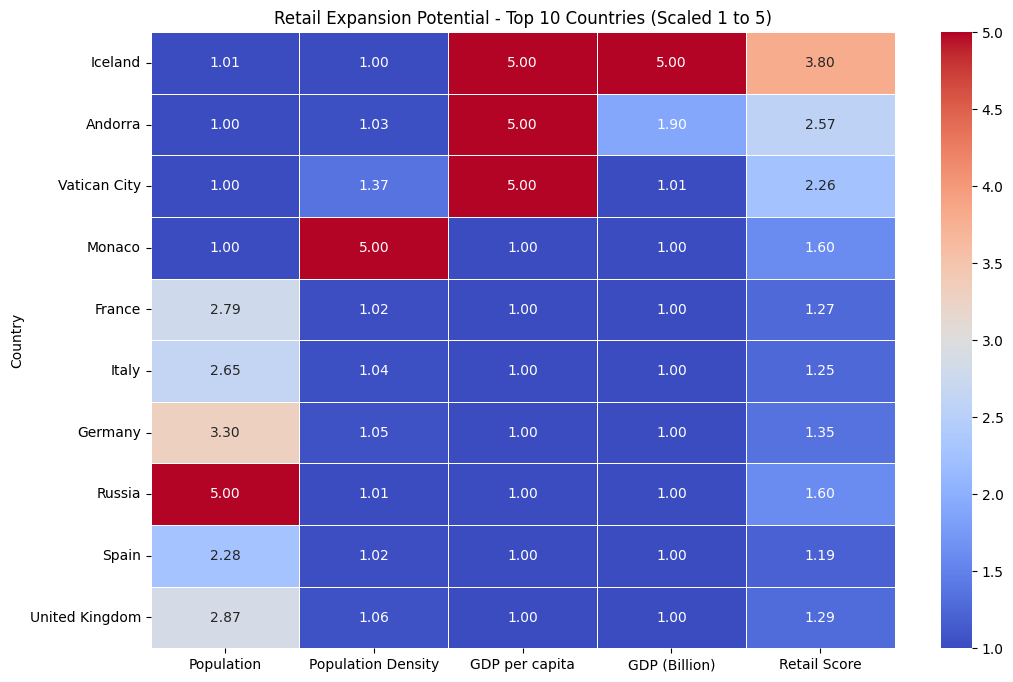

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data3 = pd.read_csv("europedata_cleaned.csv")  # Ensure the correct filename

# Rename columns for clarity (if necessary)
data3.columns = data3.columns.str.strip()  # Remove leading/trailing spaces

# Select relevant columns for analysis
df_selected = data3[["Country", "Population", "Population Density", "GDP per capita", "2024"]].copy()

# Rename '2024' to 'GDP (Billion)' for clarity
df_selected.rename(columns={"2024": "GDP (Billion)"}, inplace=True)

# Define updated weights
weights = {
    "GDP per capita": 0.3,     # Purchasing power
    "Population": 0.15,        # Market size
    "Population Density": 0.15,# Urbanization & foot traffic
    "GDP (Billion)": 0.4       # Economic stability & growth
}

# Normalize data using Min-Max Scaling (scaled between 1 and 5)
df_scaled = df_selected.copy()
for col in weights.keys():
    df_scaled[col] = 1 + 4 * (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())

# Compute the new Retail Score using weighted sum
df_scaled["Retail Score"] = sum(df_scaled[col] * weight for col, weight in weights.items())

# Get top 10 countries for retail expansion based on new weights
top_10_countries = df_scaled.nlargest(10, "Retail Score")[["Country", "Retail Score"]]

# Filter the dataset to include only the top 10 countries
df_top_10 = df_scaled[df_scaled["Country"].isin(top_10_countries["Country"])].set_index("Country")

# Heatmap for the top 10 countries (values scaled between 1 and 5)
plt.figure(figsize=(12, 8))
sns.heatmap(df_top_10, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Title and show plot
plt.title("Retail Expansion Potential - Top 10 Countries (Scaled 1 to 5)")
plt.show()

Available Columns: Index(['Country', 'Capital', 'Area_x', 'Population', 'Population Density',
       'Capi', 'Area_y', '2024', 'GDP per capita'],
      dtype='object')


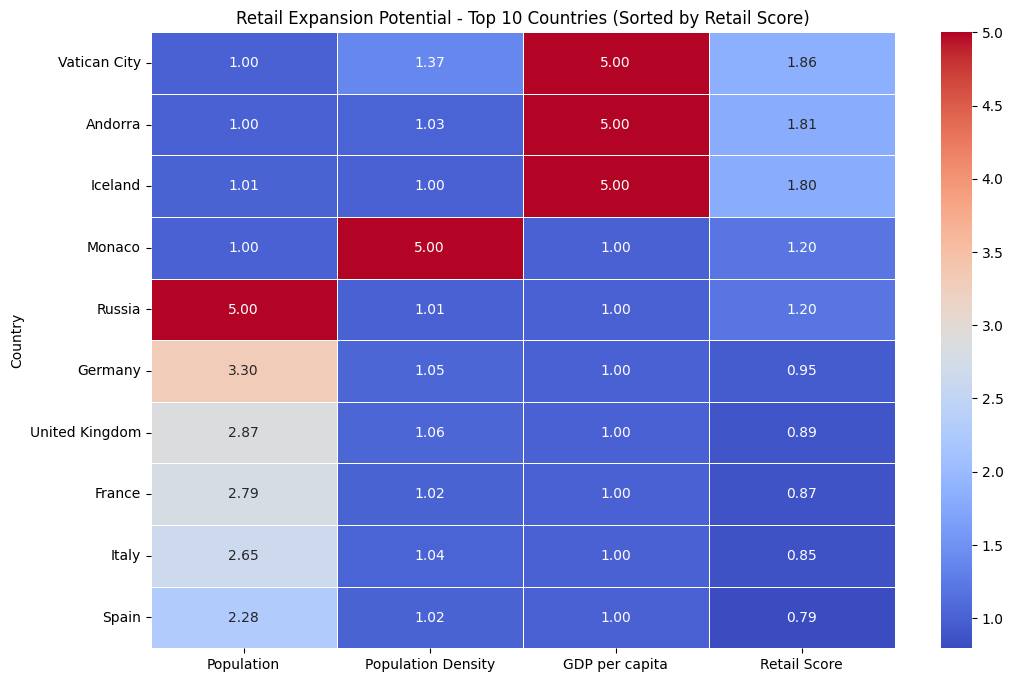

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files #This line is removed because we are not in google colab

# # Upload the CSV file #This section is removed because we are not in google colab
# uploaded = files.upload()

# # Get the uploaded filename (assuming only one file is uploaded) #This section is removed because we are not in google colab
# filename = list(uploaded.keys())[0]

filename = "europedata_cleaned.csv" #This line is added to directly address the file

# Load the dataset
df = pd.read_csv(filename, on_bad_lines='skip') # on_bad_lines='skip' added to skip problematic lines


# Print column names to verify
print("Available Columns:", df.columns)

# Define required columns
columns_needed = ["Country", "Population", "Population Density", "GDP per capita", "GDP (Billion)"]
existing_columns = [col for col in columns_needed if col in df.columns]

# Select existing columns
df_selected = df[existing_columns].copy()

# Define weights for Retail Score
weights = {
    "GDP per capita": 0.3,
    "Population": 0.15,
    "Population Density": 0.15,
    "GDP (Billion)": 0.4
}

# Normalize data using Min-Max Scaling (1 to 5)
df_scaled = df_selected.copy()
for col in weights.keys():
    if col in df_scaled.columns:
        df_scaled[col] = 1 + 4 * (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())

# Compute Retail Score
df_scaled["Retail Score"] = sum(df_scaled[col] * weight for col, weight in weights.items() if col in df_scaled.columns)

# Get top 10 countries
top_10_countries = df_scaled.nlargest(10, "Retail Score")

# Sort by Retail Score
df_top_10 = top_10_countries.set_index("Country").sort_values(by="Retail Score", ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_top_10, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Retail Expansion Potential - Top 10 Countries (Sorted by Retail Score)")
plt.show()